In [2]:
import ants
import nibabel as nib
import numpy
import brainload as bl
import brainview as bv
from mayavi import mlab
import matplotlib.pyplot as plt

/home/jacob/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning: Cant import Plotly. Install it `pip install plotly` if you want to use ants.render_surface_function
  warnings.warn('Cant import Plotly. Install it `pip install plotly` if you want to use ants.render_surface_function')


# Raw ABIDE - ANTs cortical thickness

Generating cortical thickness visualizations from the first 3 subjects of the ABIDE I CMU A raw dataset

In [26]:
def plotnii(path):
    p1 = nib.load(path) #load with nibabel
    p1 = p1.get_data()
    ants1 = ants.core.from_numpy(p1) #pass data to ANTs for plotting
    ants.plot(ants1)
    return ants1

/home/jacob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


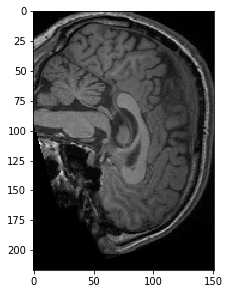

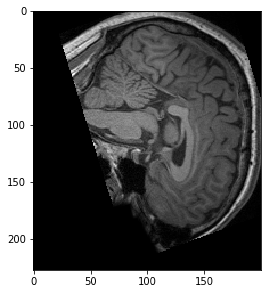

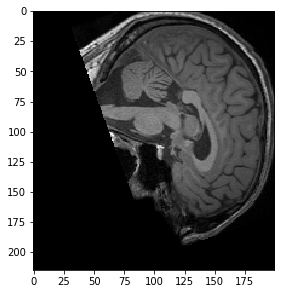

In [27]:
#Visualize the raw scans
I1 =  plotnii('./raw/mprage1.nii.gz')
I2 =  plotnii('./raw/mprage2.nii.gz')
I3 =  plotnii('./raw/mprage3.nii.gz')

In [20]:
#calculate DiReCT cortical thickness. Parameters still not optimized.
def thicknessComp(antsimg):
    mask = ants.get_mask(antsimg)
    segs = ants.kmeans_segmentation(antsimg, k=3, kmask = mask)
    thick = ants.kelly_kapowski(s=segs['segmentation'], 
                                g=segs['probabilityimages'][1],
                                w=segs['probabilityimages'][2], 
                                its=45,
                                r=0.5, m=1)
    ants.plot(thick)

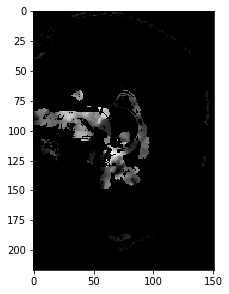

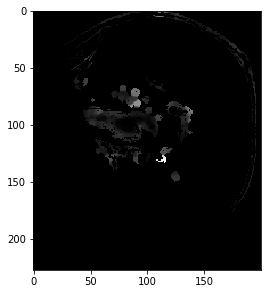

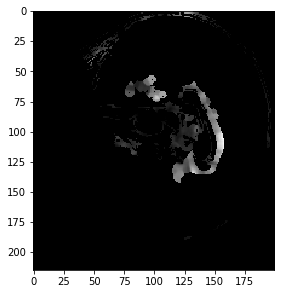

In [21]:
thicknessComp(I1)
thicknessComp(I2)
thicknessComp(I3)

# Preprocessed ABIDE - ANTs cortical thickness

Visualizing the cortical thickness of the same 3 subjects from the ABIDE preprocessed dataset

/home/jacob/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


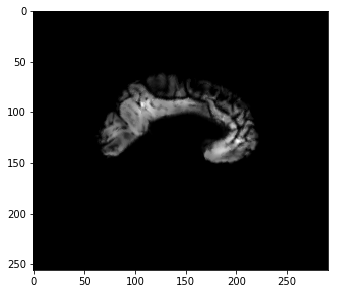

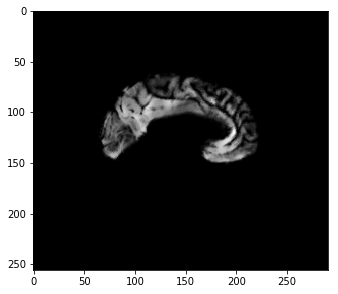

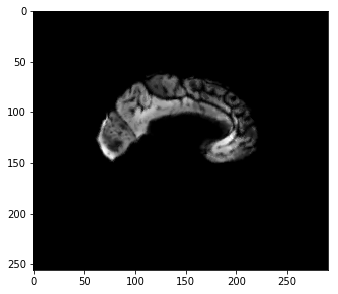

ANTsImage
	 Pixel Type : float
	 Components : 1
	 Dimensions : (216, 256, 291)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [22]:
plotnii('./preproc/ants/CMU_a_0050642_anat_thickness.nii.gz')
plotnii('./preproc/ants/CMU_a_0050646_anat_thickness.nii.gz')
plotnii('./preproc/ants/CMU_a_0050647_anat_thickness.nii.gz')

# Preprocessed ABIDE - FreeSurfer cortical thickness

In [3]:
def showFreeSurfer(subject_id, subjects_diri):
    vert_coords, faces, morphometry_data, morphometry_meta_data = bl.subject(subject_id, 
                                                                           hemi='lh', 
                                                                           measure='thickness', 
                                                                           subjects_dir=subjects_diri)
    fig = mlab.figure('Some title', bgcolor=(1, 1, 1), size=(800, 600)) #figure and scene creation.
    surface = bv.brain_morphometry_view(fig, vert_coords, faces, morphometry_data) #create mlab mesh, add to scene
    bv.show() #ineractive viewing panel.

## Note that these produce a 'pop up' of a 3D interactive display, unlike the visualizations obtained from the ANTs pipelines.

In [ ]:
showFreeSurfer("1", "./preproc/fs")

In [ ]:
showFreeSurfer("2", "./preproc/fs")

In [ ]:
showFreeSurfer("3", "./preproc/fs")